# _TP especial Fundamentos de la Ciencia de Datos_<br>
### _Grupo 7: Buralli, Todesco, Antúnez_


### <u>Descarga y lectura de archivos<u>

Empezaremos descargando y leyendo los archivos mandados por la cátedra

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.proj3d import rotation_about_vector

covers_dataset = pd.read_csv('Covers.csv')

Hacemos una vista general para saber de que se trata el dataset, que significan cada una de sus columnas

In [4]:
covers_dataset.head()

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
0,Everybody Everybody,Black Box,4:11,4,0.645,0.795,7,-12.095,1,0.0527,0.3470,0.003890,0.1040,0.535,112.067,87,1990
1,Close To You,Maxi Priest,3:45,4,0.590,0.727,6,-7.955,1,0.0706,0.0259,0.000065,0.0827,0.356,121.966,85,1990
2,Do Me!,Bell Biv DeVoe,3:56,4,0.615,0.534,9,-6.719,0,0.0386,0.1060,0.000018,0.0607,0.193,135.917,84,1990
3,Everything,Jody Watley,4:05,4,0.704,0.225,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.243,120.006,82,1990
4,What It Takes,Aerosmith,3:21,4,0.672,0.655,10,-5.021,0,0.0310,0.0362,0.000000,0.1170,0.555,134.948,82,1990


### Descripción de las variables<br>
* ```Track```: nombre de la canción
* ```Artist```: nombre del artista o intérprete
* ```Duration```: duración en minutos de la canción
* ```Time_Signature```: número de pulsaciones por compás
* ```Danceability```: medida de que tan bailable es la canción(entre 0 y 1)
* ```Energy```: medida de que tan enérgica es la canción(entre 0 y 1)
* ```Key```: tonalidad de la canción, número entero
* ```Loudness```: volumen de la canción, en decibelios
* ```Mode```: tono mayor o menor(0 o 1, respectivamente)
* ```Speechiness```: medida de presencia de palabras habladas en las canciones, valores altos indican una alta presencia de estas palabras
* ```Acoustiness```: mide que tan acústica es la pista
* ```Instrumentalness```: mide la presencia de voces en las canciones, valores más altos indican una canción con mayor parte instrumental
* ```Liveness```: probabilidad de que dicha canción se haya interpretado en vivo, niveles más altos indican mayor presencia de voces de la audiencia
* ```Valance```: medida de la positividad de la canción, niveles más altos indican presencias de mlodías alegres
* ```Tempo```: velocidad de la pista, medida en beats por minutos(BPM)
* ```Popularity```: puntuación de la canción que mide su popularidad
* ```Year```: año de lanzamiento

Identificaremos la cantidad de nulos mediante el co

In [5]:
covers_dataset.isna().sum()

Track               0
Artist              0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
Year                0
dtype: int64

Observamos que no hay NaNs, pero esto no descarta la presencia de valores extraños a analizar en las distintas columnas, por lo que verificaremos mediante el método ```value_count()```

### <u>Revision de valores<u>

In [6]:
covers_dataset["Track"].value_counts()

Track
Hold On                    3
I’ll Be There              2
Crazy                      2
Always                     2
Everything                 2
                          ..
I’m Your Angel             1
Taking Everything          1
What’s It Gonna Be?!       1
Almost Doesn’t Count       1
It Ain’t My Fault 1 & 2    1
Name: count, Length: 892, dtype: int64

En ```Track``` parece no haber presencia de valores raros, si algunos nombres repetidos.

In [7]:
covers_dataset["Artist"].value_counts()

Artist
Mariah Carey                       16
Madonna                            14
Janet Jackson                      13
Boyz II Men                        11
Whitney Houston                    10
                                   ..
112 featuring Lil Zane              1
LFO                                 1
Jive Bunny and the Mastermixers     1
Biz Markie                          1
the Righteous Brothers              1
Name: count, Length: 535, dtype: int64

Con ```Artist``` parace algo similar, nada extraño a primera vista

In [8]:
covers_dataset["Duration"].value_counts()

Duration
3:48    12
3:55    12
4:18    11
3:59    11
3:38    10
        ..
4:06     1
2:55     1
2:46     1
2:07     1
4:46     1
Name: count, Length: 253, dtype: int64

```Duration``` tampoco parece tener valores atípicos, aunque luego abria que convertir el dato a algo numerico.

In [9]:
covers_dataset['Time_Signature'].value_counts()

Time_Signature
4    865
3     45
5      6
1      3
Name: count, dtype: int64

```Time_Signature``` parece correcto.

In [10]:
covers_dataset['Danceability'].value_counts()
danceability = covers_dataset['Danceability']

En ```Danceability``` no parece que haya nada raro... Hagamos un boxplot para ver mas en detalle.

In [11]:
covers_dataset['Danceability'].min()
covers_dataset['Danceability'].max()
covers_dataset['Danceability'].median()
danceability.describe()

count    919.000000
mean       0.622967
std        0.154782
min        0.135000
25%        0.518500
50%        0.631000
75%        0.738000
max        0.979000
Name: Danceability, dtype: float64

In [12]:
covers_dataset['Energy'].value_counts()

Energy
0.521    8
0.453    6
0.498    6
0.538    6
0.640    5
        ..
0.347    1
0.388    1
0.362    1
0.805    1
0.208    1
Name: count, Length: 522, dtype: int64

A primera vista no parece haber valores extraño.

In [13]:
covers_dataset['Key'].value_counts()

Key
1     106
7     104
5      91
9      91
0      90
6      73
11     72
10     68
2      65
4      64
8      57
3      38
Name: count, dtype: int64

Todo parece normal en ```Key```.

In [14]:
covers_dataset['Loudness'].value_counts()

Loudness
-5.484     3
-8.412     3
-10.419    3
-5.109     3
-7.440     3
          ..
-10.952    1
-5.395     1
-4.699     1
-7.063     1
-8.422     1
Name: count, Length: 842, dtype: int64

Sospechosos los valores que se repiten 3 veces siendo una variable continua pero aceptable...

In [84]:
covers_dataset['Mode'].value_counts()

Mode
1    602
0    317
Name: count, dtype: int64

Predominancia del valor de 1 en ```Mode```.

In [49]:
covers_dataset['Speechiness'].value_counts()

Speechiness
0.0352    9
0.0321    8
0.0270    8
0.0277    7
0.0279    7
         ..
0.5290    1
0.0389    1
0.0239    1
0.0632    1
0.0384    1
Name: count, Length: 488, dtype: int64

Valores repetidos en una variable continua. Candidatos a invertigacion: 0.0352,0.0321,0.0270    

In [50]:
covers_dataset['Acousticness'].value_counts()

Acousticness
0.11800    5
0.21500    5
0.43400    4
0.12800    4
0.20000    4
          ..
0.40000    1
0.00913    1
0.77600    1
0.08860    1
0.92400    1
Name: count, Length: 676, dtype: int64

Hay valores repetidos 5 veces, puede investigarse...

In [51]:
covers_dataset['Instrumentalness'].value_counts()

Instrumentalness
0.000000    375
0.109000      4
0.000106      3
0.000021      3
0.000163      3
           ... 
0.000345      1
0.000162      1
0.000279      1
0.000015      1
0.000343      1
Name: count, Length: 489, dtype: int64

Muchos registros con 0 de ```Instrumentalness```, asumimos que 0 significa que la cancion es "Acapella" valores altos de ```instrumentalness``` como bien describimos al principio corresponden o "deberian" corresponder a canciones con mayor presencia instrumental. Mientras que valores menores indican lo contrario. Resaltamos el ```deberia``` porque investigando algunas canciones con valores ```instrumentalness``` estas si poseen instrumentacion.

In [9]:
covers_dataset['Instrumentalness'].max()

np.float64(0.987)

In [54]:
covers_dataset['Liveness'].value_counts()

Liveness
0.1090    14
0.1080    13
0.1040    12
0.1030    11
0.1060    11
          ..
0.0800     1
0.0779     1
0.0675     1
0.0778     1
0.0820     1
Name: count, Length: 499, dtype: int64

A primera vista no sabemos bien la razon pero en ```Liveness``` hay valores repetidos en 0.1xxx osea todos los valores que son 0.1 y algo mas.

In [61]:
covers_dataset['Valence'].value_counts()

Valence
0.287    6
0.781    5
0.510    5
0.421    5
0.807    5
        ..
0.477    1
0.862    1
0.715    1
0.390    1
0.748    1
Name: count, Length: 570, dtype: int64

Algunos valores repetidos en ```Valence``` pero zafa...

In [58]:
covers_dataset['Tempo'].value_counts()

Tempo
118.777    3
100.002    3
83.943     2
118.402    2
119.973    2
          ..
98.572     1
113.722    1
127.969    1
71.582     1
85.666     1
Name: count, Length: 873, dtype: int64

Aceptable, quizas los valores 118.777 y 100.002 podrian revisarse, tampoco que se repitan tanto en ```Tempo```

In [59]:
covers_dataset['Popularity'].value_counts()

Popularity
59    30
69    28
57    27
64    27
63    27
      ..
4      1
16     1
92     1
89     1
25     1
Name: count, Length: 82, dtype: int64

Variable discreta asi que esta bien que se repitan cosas. Tampoco exageremos!

In [60]:
covers_dataset['Year'].value_counts()

Year
1991    100
1990     99
1999     96
1992     95
1993     94
1994     91
1998     91
1997     89
1995     86
1996     78
Name: count, dtype: int64

Vemos que todas las canciones son de los '90, pero nada extraño que destacar.

**Nota: Relacionar las variables Valance y Tempo(¿la velocidad se relaciona a la positividad de la canción?)**

### <u>Corrección de tipos<u> 

 Ahora nos ocuparemos de comprobar que los tipos de las variables sean adecuados a lo que representan. Para ello, usamos el método ```info()```

In [88]:
covers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             919 non-null    object 
 1   Artist            919 non-null    object 
 2   Duration          919 non-null    object 
 3   Time_Signature    919 non-null    int64  
 4   Danceability      919 non-null    float64
 5   Energy            919 non-null    float64
 6   Key               919 non-null    int64  
 7   Loudness          919 non-null    float64
 8   Mode              919 non-null    int64  
 9   Speechiness       919 non-null    float64
 10  Acousticness      919 non-null    float64
 11  Instrumentalness  919 non-null    float64
 12  Liveness          919 non-null    float64
 13  Valence           919 non-null    float64
 14  Tempo             919 non-null    float64
 15  Popularity        919 non-null    int64  
 16  Year              919 non-null    int64  
dt

Hacemos una copia mediante el método ```copy()``` para no arruinar el dataset original

In [3]:
copy_covers_ds = covers_dataset.copy()

Convertimos el tipo de dato de la columna ```Mode``` de entero a booleano para hacer el análisis

In [6]:
copy_covers_ds['Mode'] = copy_covers_ds['Mode'].astype(bool)

Ahora nos centraremos en arreglar el tipo de la variable ```Duration```, convirtiendolo de string a integer(segundos)

In [7]:
#Por las dudas hacemos un cambio de tipos a string.
copy_covers_ds['Duration'] = copy_covers_ds['Duration'].astype(str)
#Creamos la nueva columna con los valores correctos convertidos a segundos(todavia no estan los valores).
copy_covers_ds['DURATION(s)'] = 0
#Por cada registro hacemos:
for index,row in copy_covers_ds.iterrows():
    #duracion original se vuelve el valor de duracion de la fila.
    duracion_original = row['Duration']
    #Separamos por : los minutos y segundos.
    minutos , segundos = duracion_original.split(':')
    #Asignamos los minutos * 60 + los segundos obtenidos a la fila en la columna nueva, casteamos ambos parametros a segundos porque sino hace cualquier cosa.
    copy_covers_ds.at[index,'DURATION(s)'] = int(minutos) * 60 + int(segundos)
#Mostramos resultados.
copy_covers_ds.head()

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
0,Everybody Everybody,Black Box,4:11,4,0.645,0.795,7,-12.095,True,0.0527,0.3470,0.003890,0.1040,0.535,112.067,87,1990,251
1,Close To You,Maxi Priest,3:45,4,0.590,0.727,6,-7.955,True,0.0706,0.0259,0.000065,0.0827,0.356,121.966,85,1990,225
2,Do Me!,Bell Biv DeVoe,3:56,4,0.615,0.534,9,-6.719,False,0.0386,0.1060,0.000018,0.0607,0.193,135.917,84,1990,236
3,Everything,Jody Watley,4:05,4,0.704,0.225,6,-14.454,False,0.0994,0.9020,0.657000,0.1060,0.243,120.006,82,1990,245
4,What It Takes,Aerosmith,3:21,4,0.672,0.655,10,-5.021,False,0.0310,0.0362,0.000000,0.1170,0.555,134.948,82,1990,201


### <u>Analisis de distribuciones<u>



Ahora observaremos como se distribuye cada variable para poder aprender un poco sobre el conjunto de datos y obtener conclusiones. Tomaremos las variables más interesantes para analizar y cuyo gráfico nos pueda aportar algo de valor

# Analisis de ```Danceability```

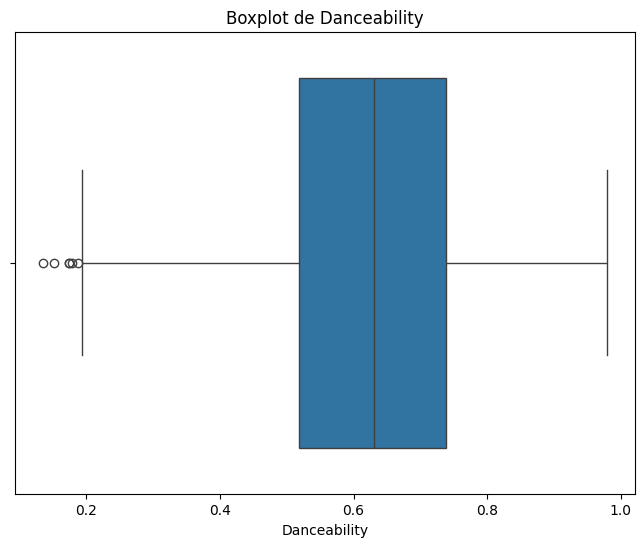

In [8]:
# Nos quedamos solo con la columna Danceability
danceability = covers_dataset["Danceability"]

# Creamos el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=danceability)
plt.title("Boxplot de Danceability")
plt.xlabel("Danceability")
plt.show()

In [9]:
min = copy_covers_ds["Danceability"].min()
copy_covers_ds[copy_covers_ds["Danceability"] == min]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
323,Connected,Stereo MC’s,3:16,4,0.135,0.00134,2,-42.95,True,0.0496,0.969,0.972,0.0884,0.0372,141.488,66,1993,196


Parece que hay unos valores del lado izquierdo, podrian ser posibles outliers. 

# Analisis de ```Duration```

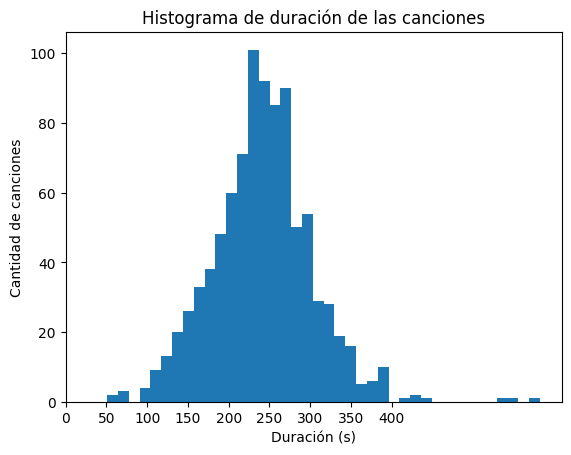

In [10]:
bins = 40

plt.hist(copy_covers_ds['DURATION(s)'], bins = bins)

plt.xlabel('Duración (s)')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de duración de las canciones')
plt.xticks(range(0, 450, 50))
plt.show()

Se puede ver que la mayoría de las canciones duran entre 150 y 300 segundos(2:30 y 5:00 minutos). Hay algunos outliers que superan los 500 segundos(8:33 minutos) y hay que corroborrar que sean correctos

In [11]:
max = copy_covers_ds["DURATION(s)"].max()
copy_covers_ds[copy_covers_ds["DURATION(s)"] == max]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
699,Feels So Good,Mase,9:42,4,0.576,0.603,5,-9.603,True,0.0329,0.455,0.0537,0.0406,0.524,103.658,51,1997,582


Corroboramos en internet que la canción dura 3:29 minutos, paro no meter mano en los datos podemos simplemente borrar estos tres outliers para que no molesten.

In [12]:
copy_covers_ds[copy_covers_ds['DURATION(s)'] > 500]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
204,November Rain,Guns N’ Roses,8:56,4,0.294,0.640,11,-9.316,True,0.0291,0.016,0.22000,0.1120,0.226,79.790,78,1992,536
485,Runaway,Janet Jackson,9:07,4,0.374,0.568,1,-3.825,False,0.1090,0.219,0.00219,0.5130,0.111,84.733,80,1995,547
699,Feels So Good,Mase,9:42,4,0.576,0.603,5,-9.603,True,0.0329,0.455,0.05370,0.0406,0.524,103.658,51,1997,582


La segunda canción más larga es "November Rain" de Guns 'n Roses y su duración concuerda con el dataset

Podemos tomar como medida eliminar estos tres outliers que nos estan afectando la distribucion en la curva.

In [13]:
copy_covers_ds = copy_covers_ds[copy_covers_ds['DURATION(s)'] < 500]

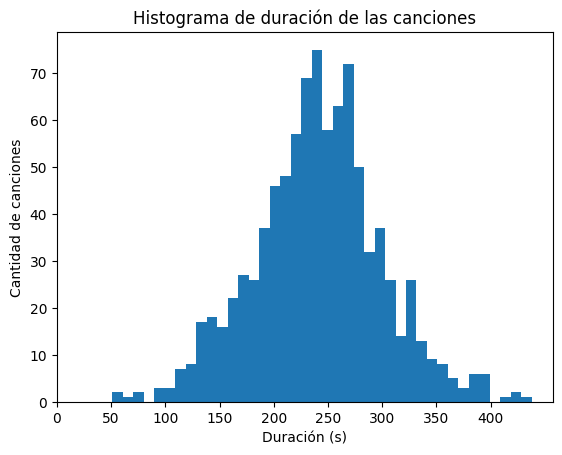

In [14]:
bins = 40

plt.hist(copy_covers_ds['DURATION(s)'], bins = bins)

plt.xlabel('Duración (s)')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de duración de las canciones')
plt.xticks(range(0, 450, 50))
plt.show()

Ahora si ;)

# Analisis de ```Instrumentalness```

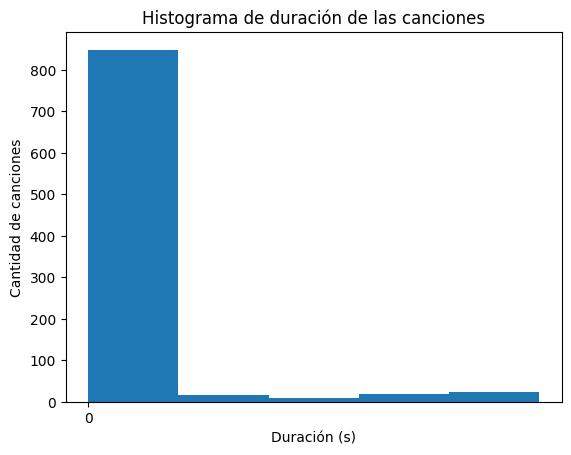

In [16]:
bins = 5

plt.hist(copy_covers_ds['Instrumentalness'], bins = bins)

plt.xlabel('Duración (s)')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de duración de las canciones')
plt.xticks(range(0, 1, 1))
plt.show()

Podriamos discretizar la variable, por ejemplo utilizar una escala "nula, baja, media, alta"

In [17]:
#Creamos la nueva columna con las variable discretizada(todavia no hay nada) y la inicializamos en nulo.
copy_covers_ds['Instrumentalness Type'] = pd.NA
#Por cada registro hacemos:
for index,row in copy_covers_ds.iterrows():
    #Consideramos los 4 casos(intervalos) y asignamos el nueva valor segun corresponda
    instrulmentalness_original = row['Instrumentalness']
    if(instrulmentalness_original == 0):
        instrulmentalness_nueva = 'nula'
    elif(instrulmentalness_original > 0 and instrulmentalness_original <= 0.4 ) :
        instrulmentalness_nueva = 'baja'
    elif(instrulmentalness_original > 0.4 and instrulmentalness_original <= 0.7) :
        instrulmentalness_nueva = 'media'
    elif(instrulmentalness_original > 0.7 and instrulmentalness_original <= 1) :
        instrulmentalness_nueva = 'alta'
        
    copy_covers_ds.at[index,'Instrumentalness Type'] = instrulmentalness_nueva

copy_covers_ds.head()

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s),Instrumentalness Type
0,Everybody Everybody,Black Box,4:11,4,0.645,0.795,7,-12.095,True,0.0527,0.3470,0.003890,0.1040,0.535,112.067,87,1990,251,baja
1,Close To You,Maxi Priest,3:45,4,0.590,0.727,6,-7.955,True,0.0706,0.0259,0.000065,0.0827,0.356,121.966,85,1990,225,baja
2,Do Me!,Bell Biv DeVoe,3:56,4,0.615,0.534,9,-6.719,False,0.0386,0.1060,0.000018,0.0607,0.193,135.917,84,1990,236,baja
3,Everything,Jody Watley,4:05,4,0.704,0.225,6,-14.454,False,0.0994,0.9020,0.657000,0.1060,0.243,120.006,82,1990,245,media
4,What It Takes,Aerosmith,3:21,4,0.672,0.655,10,-5.021,False,0.0310,0.0362,0.000000,0.1170,0.555,134.948,82,1990,201,nula


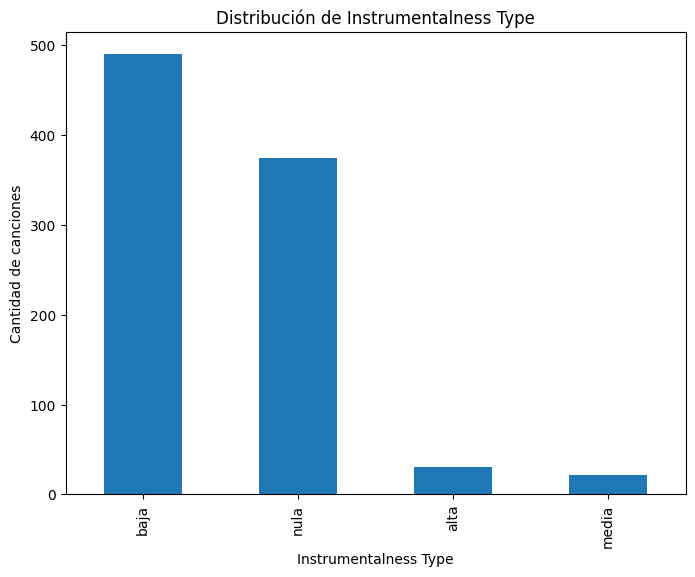

In [18]:
# Contar la cantidad de cada tipo de 'Instrumentalness Type'
instrumentalness_counts = copy_covers_ds['Instrumentalness Type'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
instrumentalness_counts.plot(kind='bar')
plt.title('Distribución de Instrumentalness')
plt.xlabel('Instrumentalness Type')
plt.ylabel('Cantidad de canciones')
plt.show()

Podemos ver que hay muchas canciones con instrumentalizacion baja(cuidado que el intervalo para bajo es un poco mayor(0.1). Y que tambien hay muchas canciones con una instrumentalizacion nula(0 de instrumentalizacion)

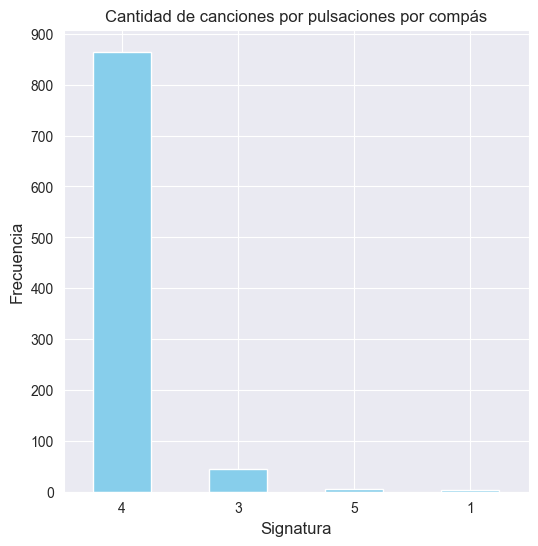

In [20]:
# Contar la cantidad de cada tipo de 'Instrumentalness Type'
Time_signature_counts = copy_covers_ds['Time_Signature'].value_counts()

plt.figure(figsize=(6,6))
Time_signature_counts.plot(kind = 'bar', color='skyblue')
plt.yticks(range(0,901,100))
plt.xticks(rotation = 0)
plt.title('Cantidad de canciones por pulsaciones por compás')
plt.xlabel('Signatura', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()